In [1]:
def tensor_to_image(tensor):
    tensor = tensor.squeeze().permute(1, 2, 0)
    return tensor.detach().numpy()

In [2]:
import diffusers
import torch
import matplotlib.pyplot as plt

In [18]:
vq_model = diffusers.VQModel()
unet = diffusers.UNet2DModel(sample_size=64)
schedule = diffusers.DDIMScheduler()

In [4]:
test_input = torch.randn((1, 3, 128, 128))
encode = model.encoder(test_input)
decode = model.decoder(encode)

In [5]:
encode.shape

torch.Size([1, 3, 128, 128])

In [6]:
decode.shape

torch.Size([1, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


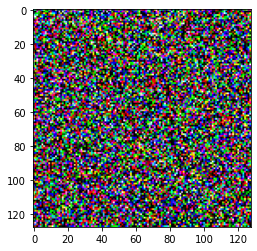

In [7]:
plt.imshow(tensor_to_image(test_input))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


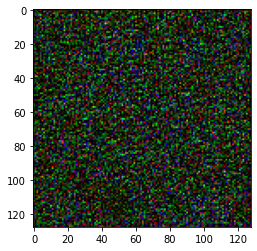

In [8]:
plt.imshow(tensor_to_image(encode))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


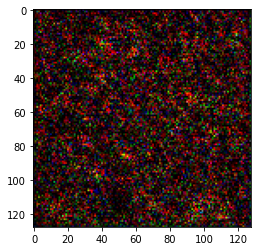

In [9]:
plt.imshow(tensor_to_image(decode))

In [19]:
ldm = diffusers.LDMPipeline(vq_model, unet, schedule)

In [20]:
ldm = ldm.to("cuda")

In [21]:
image = ldm()

  0%|          | 0/50 [00:00<?, ?it/s]

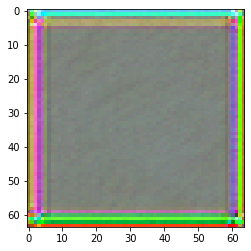

In [26]:
plt.imshow(image.images[0])

In [32]:
image.images[0].size

(64, 64)